# Sentiment Classification

## Task 1:- Represent each review using an N-gram model

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

# Importing libraries for NLP techniques to pre-process data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score
from sklearn.metrics import f1_score, precision_score, roc_curve

# Importing packages for building conventional supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Import KerasClassifier from Keras for connecting neural networks with sklearn and GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Vishwam
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Vishwam
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vishwam
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load the dataset

In [2]:
# Reading the training data set
movie_reviews = pd.read_csv("train_file_kaggle.csv")
print(movie_reviews.shape)
movie_reviews.head()

(7463, 2)


,Reviews,Sentiments
0,"bittersweet comedy/drama full of life , hand g...",pos
1,you have to pay attention to follow all the st...,pos
2,"overall , interesting as a documentary -- but ...",pos
3,precocious smarter-than-thou wayward teen stru...,pos
4,nicolas philibert observes life inside a one-r...,pos


## Tokenization and Stopwords removal

In [3]:
# Tokenization of text
tokenizer = ToktokTokenizer()

# Setting English stopwords 
stopword_list = nltk.corpus.stopwords.words('english')

In [4]:
# Set stopwords to english
stop = set(stopwords.words('english'))
print(stop)

# Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply function on reviews columns in the dataframe
movie_reviews['Reviews'] = movie_reviews['Reviews'].apply(remove_stopwords)

{'over', 'about', 'isn', 'most', 'being', 'which', 'they', 'after', 'some', 'is', 'on', 'with', 'you', 'by', 'hasn', 'any', 'her', "you're", 'too', "couldn't", 'above', 'very', "wouldn't", 'me', 'few', 'doing', 'yourself', 'does', 'don', 'yourselves', 'all', 'but', 'and', 'before', 's', 'd', 'aren', 'won', 'off', "that'll", 'were', 'them', "hadn't", 'than', 'because', 'between', "hasn't", "don't", 'those', "it's", 'each', 'same', 'only', 'ours', 'during', 'such', 'can', "haven't", 'no', 'was', "shouldn't", 'herself', 'shan', 'where', 'the', 'mustn', 'it', "isn't", 'your', 'their', 'who', 'whom', 're', 'needn', 'there', 'out', 'an', 'theirs', 'under', 'did', 'up', 'hers', 'nor', 'down', 'into', 'this', 'against', "you'd", "she's", 'not', 'll', 'further', 't', 'both', 'been', 'have', 'himself', 'that', 'didn', 'we', "shan't", 'wasn', 'wouldn', 'from', 'his', 'couldn', 'its', 'if', 'these', 'own', 'myself', 'a', 'again', 'more', 'hadn', 'haven', "needn't", 'once', 'm', 'other', 'shouldn',

## Stemming

In [5]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

# Aplly function to the review column
movie_reviews['Reviews'] = movie_reviews['Reviews'].apply(simple_stemmer)

## Lemmatization

In [6]:
# Performing Lemmatization
def simple_lemmatize(text):
    wnl = nltk.WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text

# Apply function to the review columns
movie_reviews['Reviews'] = movie_reviews['Reviews'].apply(simple_lemmatize)

In [7]:
# Reviewing the dataset after using NLP techniques to pre-process it 
movie_reviews.head()

,Reviews,Sentiments
0,"bittersweet comedy/drama full life , hand gest...",pos
1,"pay attent follow stori , ' interest . movi we...",pos
2,"overal , interest documentari -- imaxi .",pos
3,precoci smarter-than-th wayward teen struggl r...,pos
4,nicola philibert observ life insid one-room sc...,pos


## Tf-idf Preparation

In [8]:
# Split the data into training and validation dataset.
train, val = train_test_split(movie_reviews, test_size=0.2, random_state=123)
print(train.shape)
print(val.shape)

(5970, 2)
(1493, 2)


In [9]:
train_reviews = list(train['Reviews'])
val_reviews = list(val['Reviews'])

# Tf-idf Vectorizer
tv = TfidfVectorizer(max_features=500, use_idf=True, ngram_range=(1,2))
tv.fit(train_reviews)

# Transform Training reviews
tv_train_reviews = tv.fit_transform(train_reviews)

# Transform Validation reviews
tv_val_reviews = tv.transform(val_reviews)

# Check the shape of the transform training and validation reviews
print("Training reviews: ", tv_train_reviews.shape)
print("Validation reviews: ", tv_val_reviews.shape)

Training reviews:  (5970, 500)
Validation reviews:  (1493, 500)


In [10]:
# Splitting the sentiment data
train_sentiments = train['Sentiments']
val_sentiments = val['Sentiments']

# Converting 'pos' and 'neg' classed into 0 and 1 in the training dataset output
lr = preprocessing.LabelEncoder()
lr.fit(train_sentiments)
train_sentiments = lr.transform(train_sentiments)
train_sentiments = pd.DataFrame(train_sentiments, columns=['Sentiments'])

# Converting 'pos' and 'neg' classed into 0 and 1 in the validation dataset output
lr = preprocessing.LabelEncoder()
lr.fit(val_sentiments)
val_sentiments = lr.transform(val_sentiments)
val_sentiments = pd.DataFrame(val_sentiments, columns=['Sentiments'])

print(train_sentiments)
print(val_sentiments)

      Sentiments
0              0
1              0
2              0
3              1
4              0
...          ...
5965           0
5966           1
5967           1
5968           1
5969           0

[5970 rows x 1 columns]
      Sentiments
0              1
1              1
2              1
3              1
4              1
...          ...
1488           1
1489           1
1490           0
1491           1
1492           1

[1493 rows x 1 columns]


# Task 2:- Build a conventional supervised machine-learning model

#### Training different classification models on the training data set and testing its performance 
- Logistic regression model
- Decision tree model
- kNN model
- Random forest classifier model

In [11]:
# logistic regression model on the training dataset.
log_reg_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=400, verbose=1, random_state=123)
log_reg_model.fit(tv_train_reviews, train_sentiments)

# Checking its performance accuracy score.
log_train_acc = log_reg_model.score(tv_train_reviews, train_sentiments)
log_val_acc = log_reg_model.score(tv_val_reviews, val_sentiments)

# Decision tree classification model on the training dataset.
tree_clf_best = DecisionTreeClassifier(random_state=123, max_depth=50)
tree_clf_best.fit(tv_train_reviews, train_sentiments)

# Check its performance accuracy score.
tree_train_acc = tree_clf_best.score(tv_train_reviews, train_sentiments)
tree_val_acc = tree_clf_best.score(tv_val_reviews, val_sentiments)

# kNN classification model on the training dataset.
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 51)}

# Defining paramter range
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

# Inserting the best parameter and re-fitting the model
knn_clf_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_clf_best.fit(tv_train_reviews, train_sentiments)

# Check its performance accuracy score
knn_train_acc = knn_clf_best.score(tv_train_reviews, train_sentiments)
knn_val_acc = knn_clf_best.score(tv_val_reviews, val_sentiments)

# Creating dataframe 
pd.DataFrame([[log_train_acc, log_val_acc], [tree_train_acc, tree_val_acc], [knn_train_acc, knn_val_acc]],
              columns=['Training Accuracy', 'Validation Accuracy'], 
             index= ['Logistic', 'Tree', 'KNN'])

[LibLinear]Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Training Accuracy,Validation Accuracy
Logistic,0.742546,0.699933
Tree,0.728643,0.588747
KNN,0.859799,0.582719


### Observation:-
- **We see that the training and validation accuracies for the three models is not upto expectation for performance.**
- **If the model is showing good on training accuracy, there seems to be overfitting as its validation accuracy will be low.**

In [12]:
# Creating a random forest classifier and fitting it into the data.
rf = RandomForestClassifier(n_estimators = 200, 
                            max_depth = 20, 
                            class_weight = 'balanced', 
                            random_state = 123)
rf.fit(tv_train_reviews, train_sentiments)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=123)

In [13]:
# Obtaining predictions on the training and validation datasets
y_pred_train = rf.predict(tv_train_reviews)
y_pred_val = rf.predict(tv_val_reviews)

In [14]:
# Evaluating random forest model on the training and validation sets using the confusion metrics and AUC of ROC
print("\n Confusion matrix on the training dataset: \n", confusion_matrix(train_sentiments, y_pred_train))
print("\n Confusion matrix on the validation dataset: \n", confusion_matrix(val_sentiments, y_pred_val))
print("\n AUC of ROC on the training dataset: \n", roc_auc_score(train_sentiments, y_pred_train))
print("\n AUC of ROC on the validation dataset: \n", roc_auc_score(val_sentiments, y_pred_val))


 Confusion matrix on the training dataset: 
 [[2603  363]
 [ 720 2284]]

 Confusion matrix on the validation dataset: 
 [[518 225]
 [287 463]]

 AUC of ROC on the training dataset: 
 0.8189662603155334

 AUC of ROC on the validation dataset: 
 0.6572534768954686


### Observations:- 
- We see that among all the models, random forest classifier performs well on the dataset.
- Further tuning hyperparameter and retraining the model.

In [15]:
# Defining an Random forest classifier
rf_best = RandomForestClassifier(class_weight = 'balanced',
                                random_state = 123)

# Defining parameter range
param_grid = {'n_estimators': np.arange(100, 1000, 100),
             'max_depth': np.arange(1,11,1)}

# Running grid search to find the best combination of hyperparameters.
grid = GridSearchCV(rf_best, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

grid_search.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'max_depth': 8, 'n_estimators': 900}

In [16]:
# Retrain the model with the best optimal values
rf_best = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                                max_depth = grid_search.best_params_['max_depth'],
                                class_weight = 'balanced',
                                random_state= 123)

rf_best.fit(tv_train_reviews, train_sentiments)

# Finding the accuracies of the updated Random Forest model
rf_train_acc = rf_best.score(tv_train_reviews, train_sentiments)
rf_val_acc = rf_best.score(tv_val_reviews, val_sentiments)

print("Accuracy on the training dataset: ", rf_train_acc)
print("Accuracy on the validation dataset: ", rf_val_acc)

Accuracy on the training dataset:  0.7467336683417085
Accuracy on the validation dataset:  0.6550569323509712


In [17]:
# Obtaining predictions on the training and validation dataset
rf_pred_train = rf_best.predict(tv_train_reviews)
rf_pred_val = rf_best.predict(tv_val_reviews)

# Evaluating the Random forest classifier model on the training and validation dataset using confusion matrix and AUC of ROC
print("\n Confusion Matrix on the training dataset:\n", confusion_matrix(train_sentiments, rf_pred_train))
print("\n Confusion Matrix on the validation dataset:\n",confusion_matrix(val_sentiments, rf_pred_val))
print("\n ROC AUC on the training dataset:\n", roc_auc_score(train_sentiments, rf_pred_train))
print("\n ROC AUC on the validation dataset:\n", roc_auc_score(val_sentiments, rf_pred_val))


 Confusion Matrix on the training dataset:
 [[2387  579]
 [ 933 2071]]

 Confusion Matrix on the validation dataset:
 [[520 223]
 [292 458]]

 ROC AUC on the training dataset:
 0.747100853615723

 ROC AUC on the validation dataset:
 0.6552660385823239


# Task 3:- Build a deep learning model

In [18]:
# Converting the sparse matrix of a dataset obtained from Tf-idf Vectorization to a sparse tensor.
# This is done as Keras runs on Tensorflow backend and a Keras model accepts a sparse tensor as input, not a sparse matrix
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

In [19]:
# Converting sparse matrix to sparse tensor to submit as input to the Keras model
# Sparse reordering is done because tensorflow accepts input in row-major format.

# For the training dataset
tv_train_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_train_reviews))
train_sentiments_nn = np.asarray(train_sentiments)

# For the validation dataset
tv_val_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_val_reviews))
val_sentiments_nn = np.asarray(val_sentiments)

In [20]:
# Defining a fully connected feedforward neural network
def create_nn(activation_function = 'relu',
             hidden1_neurons = 256):
    
    # keras.Input is the input layer of the neural network
    input = keras.Input(shape = (500, ), sparse=True, name='Tfidf_maxfeatures')
    
    # The first hidden layer has 256 nodes and takes the previous layer (input layer) as input as mentioned below
    hidden1 = layers.Dense(hidden1_neurons,
                          activation = activation_function)(input)
    
    # The second hidden layer has 256 nodes and takes the previous layer (first hidden layer) as input as mentioned below
    hidden2 = layers.Dense(64, 
                          activation = activation_function)(hidden1)
    
    # The output layer has 1 node and takes the previous layer (second hidden layer) as input as mentioned below
    output = layers.Dense(1, 
                          activation = 'sigmoid')(hidden2)
    
    return keras.Model(input, output)

In [21]:
nn1 = create_nn()

# Compile the model using learning_rate = 0.01
learning_rate_value = 0.01
nn1.compile(loss = 'binary_crossentropy',
           metrics = ['accuracy'],
           optimizer = RMSprop(learning_rate = learning_rate_value))

nn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Tfidf_maxfeatures (InputLay  [(None, 500)]            0         
 er)                                                             
                                                                 
 dense (Dense)               (None, 256)               128256    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 144,769
Trainable params: 144,769
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training the neural network model on the dataset
nn1_history = nn1.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data = (tv_val_reviews_nn, val_sentiments_nn), epochs=10)

Epoch 1/10
187/187 [==============================] - 1s 4ms/step - loss: 0.6228 - accuracy: 0.6501 - val_loss: 0.5887 - val_accuracy: 0.7093
Epoch 2/10
187/187 [==============================] - 1s 3ms/step - loss: 0.5343 - accuracy: 0.7280 - val_loss: 0.6362 - val_accuracy: 0.6912
Epoch 3/10
187/187 [==============================] - 1s 3ms/step - loss: 0.4743 - accuracy: 0.7672 - val_loss: 0.6327 - val_accuracy: 0.6973
Epoch 4/10
187/187 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8291 - val_loss: 0.7183 - val_accuracy: 0.6966
Epoch 5/10
187/187 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.8851 - val_loss: 0.9025 - val_accuracy: 0.6845
Epoch 6/10
187/187 [==============================] - 1s 3ms/step - loss: 0.1497 - accuracy: 0.9353 - val_loss: 1.3176 - val_accuracy: 0.6604
Epoch 7/10
187/187 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.9573 - val_loss: 1.5998 - val_accuracy: 0.6410
Epoch 

In [23]:
# Convert the neural network history object into a dataframe to view its specifies
hist = pd.DataFrame(nn1_history.history)
hist['epochs'] = nn1_history.epoch
hist['epochs'] = hist['epochs'].apply(lambda x: x+1)
hist.set_index('epochs')

,loss,accuracy,val_loss,val_accuracy
epochs,,,,
1,0.622798,0.650084,0.588708,0.709310
2,0.534304,0.727973,0.636234,0.691226
3,0.474282,0.767169,0.632681,0.697254
4,0.374354,0.829146,0.718259,0.696584
5,0.254510,0.885092,0.902492,0.684528
6,0.149674,0.935343,1.317611,0.660415
7,0.092194,0.957286,1.599820,0.640991
8,0.072105,0.967337,1.694982,0.657066
9,0.068630,0.969347,1.989867,0.650368


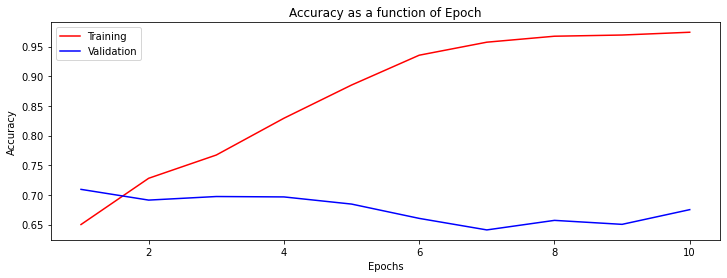

In [24]:
# View the training and validation accuracy as a function of epoch
plt.figure(figsize=(12, 4))

sns.lineplot(data = hist, x ='epochs', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epochs', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of Epoch')
plt.show()

In [25]:
# Compute the final accuracy of the model on the validation data set
performance_test = nn1.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print("The loss value of the model on the validation data set is {}".format(performance_test[0]))
print("The accuracy score of the model on the validation data set is {}".format(performance_test[1]))

47/47 [==============================] - 0s 2ms/step - loss: 2.3460 - accuracy: 0.6752
The loss value of the model on the validation data set is 2.3460397720336914
The accuracy score of the model on the validation data set is 0.6751506924629211


In [26]:
# Declare a range of activation functions and number of neurons in the first hidden layer to tune for
activation_function_list = ['sigmoid', 'relu']
hidden1_neuron_list = [128, 256]

# Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_activation_function in activation_function_list:
    for current_hidden1_neuron in hidden1_neuron_list:
        indexcount = indexcount + 1
        
        # Create a neural network model using the 'create_nn' function
        nn = create_nn(activation_function = current_activation_function,
                      hidden1_neurons = current_hidden1_neuron)
        
        nn.compile(loss = 'binary_crossentropy',
                  metrics = ['accuracy'],
                  optimizer = RMSprop(learning_rate = 0.01))
        
        # Capture the training history of the model
        print("\n Activation function = {}".format(current_activation_function) + 'hidden1 Neurons = {} - START \n'.format(current_hidden1_neuron))
        nn.summary()
        print('\n')
        nn_history = nn.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data = (tv_val_reviews, val_sentiments_nn), epochs=10)
        print("\n Activation function = {}".format(current_activation_function) + 'hidden1 Neurons = {} - END \n'.format(current_hidden1_neuron))
        
        hist[indexcount] = pd.DataFrame(nn_history.history)
        hist[indexcount]['epoch'] = nn_history.epoch
        
        tempdf = pd.DataFrame(index = [indexcount],
                             data = {'Activation Function': current_activation_function,
                                    'First Hidden neuron layer': current_hidden1_neuron,
                                    'Train Accuracy': hist[indexcount]['accuracy'][9],
                                    'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
        
        performance_df = pd.concat([performance_df, tempdf])


 Activation function = sigmoidhidden1 Neurons = 128 - START 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Tfidf_maxfeatures (InputLay  [(None, 500)]            0         
 er)                                                             
                                                                 
 dense_3 (Dense)             (None, 128)               64128     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 72,449
Trainable params: 72,449
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
187/187 [==============================] - 2s

                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 144,769
Trainable params: 144,769
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
187/187 [==============================] - 2s 5ms/step - loss: 0.6226 - accuracy: 0.6497 - val_loss: 0.5782 - val_accuracy: 0.6892
Epoch 2/10
187/187 [==============================] - 1s 4ms/step - loss: 0.5394 - accuracy: 0.7265 - val_loss: 0.5766 - val_accuracy: 0.6952
Epoch 3/10
187/187 [==============================] - 1s 4ms/step - loss: 0.4811 - accuracy: 0.7633 - val_loss: 0.5869 - val_accuracy: 0.7013
Epoch 4/10
187/187 [==============================] - 1s 4ms/step - loss: 0.3856 - accuracy: 0.8193 - va

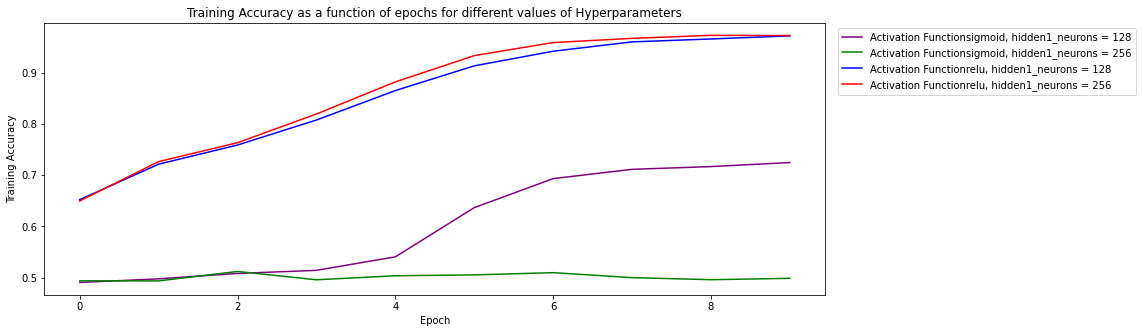

In [27]:
# View the training accuracy as a function of epochs for different values of learning rate
plt.figure(figsize=(14, 5))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neuron in hidden1_neuron_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'accuracy',
                    color = colorlist[indexcount],
                    label = 'Activation Function' + str(current_activation_function) + ', hidden1_neurons = ' + str(current_hidden1_neuron))
        
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a function of epochs for different values of Hyperparameters')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

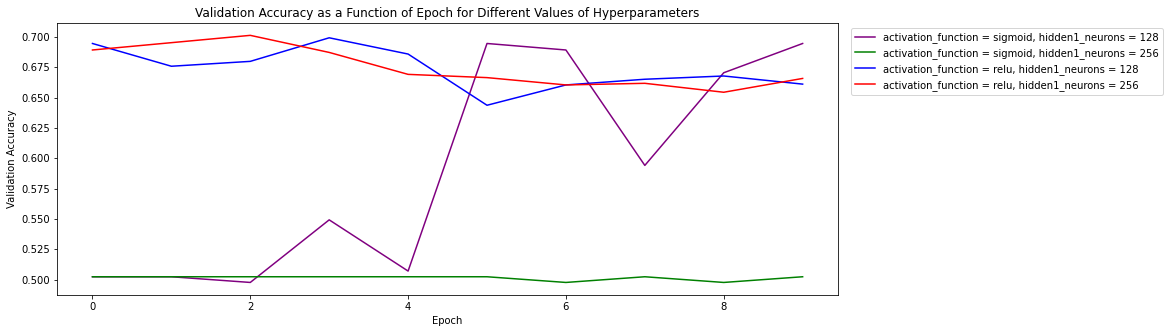

In [28]:
# View the training accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 5))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neuron in hidden1_neuron_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'val_accuracy',
                    color = colorlist[indexcount],
                    label = 'activation_function = ' + str(current_activation_function) + ', hidden1_neurons = ' + str(current_hidden1_neuron))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Hyperparameters')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

In [29]:
# Retrain the model with the optimal combinations of hyperparameters and save its training history 

# Use the create_nn function to create a neural network with the optimal values of 'activation_function' and 'hidden1_neurons'.
nn2 = create_nn(activation_function = 'relu', hidden1_neurons = 128)

nn2.compile(loss = 'binary_crossentropy',
           metrics = ['accuracy'],
           optimizer = RMSprop(learning_rate = 0.01))

# Capture the training history of the model
nn2.summary()
print('\n')
nn2_history = nn2.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data = (tv_val_reviews_nn, val_sentiments_nn), epochs=10)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Tfidf_maxfeatures (InputLay  [(None, 500)]            0         
 er)                                                             
                                                                 
 dense_15 (Dense)            (None, 128)               64128     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 72,449
Trainable params: 72,449
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
187/187 [==============================] - 2s 4ms/step - loss: 0.6216 - accuracy: 0.6489 - val_loss: 0.6038 

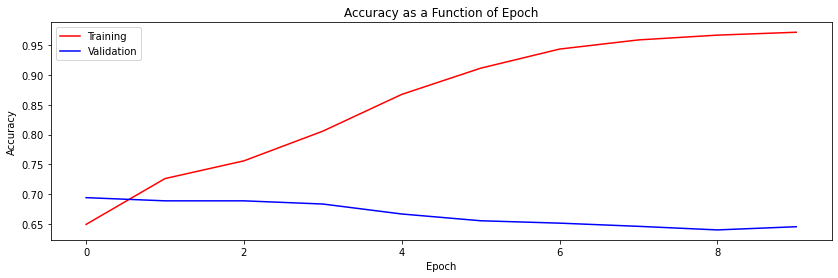

In [30]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch')
plt.show()

In [31]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn2.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

47/47 [==============================] - 0s 2ms/step - loss: 2.2393 - accuracy: 0.6450
The loss value of the model on the validation data is 2.239326238632202
The accuracy of the model on the validation data is 0.6450100541114807


# Task 4:- Evaluate the models

In [32]:
# Evaluate the Random Forest Model using standard classification metrics
pd.DataFrame([[accuracy_score(train_sentiments, y_pred_train), accuracy_score(val_sentiments, y_pred_val)],
              [recall_score(train_sentiments, y_pred_train,pos_label=1),recall_score(val_sentiments, y_pred_val,pos_label=1)],
              [recall_score(train_sentiments, y_pred_train,pos_label=0),recall_score(val_sentiments, y_pred_val,pos_label=0)],
              [roc_auc_score(train_sentiments, y_pred_train),roc_auc_score(val_sentiments, y_pred_val)],
              [f1_score(train_sentiments, y_pred_train),f1_score(val_sentiments, y_pred_val)],
              [precision_score(train_sentiments, y_pred_train),precision_score(val_sentiments, y_pred_val)]],
              columns=['Training', 'Validation'], 
              index = ['Accuracy', 'Sensitivity', 'Specificity', 'ROC_AUC', 'F1 Score', 'Precision score'])

,Training,Validation
Accuracy,0.818593,0.657066
Sensitivity,0.760320,0.617333
Specificity,0.877613,0.697174
ROC_AUC,0.818966,0.657253
F1 Score,0.808353,0.643950
Precision score,0.862864,0.672965


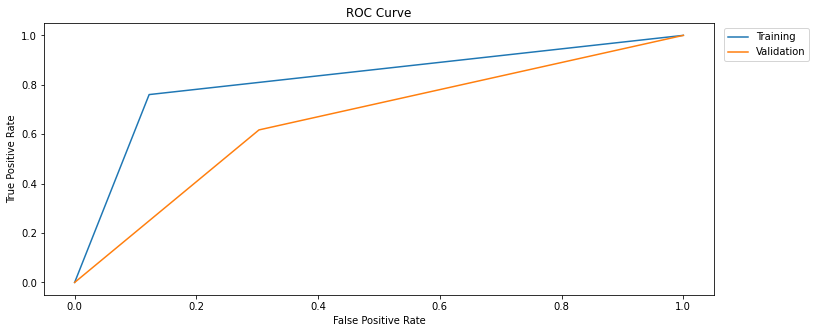

In [33]:
# Plot ROC curve
plt.figure(figsize=(12, 5))
fpr,tpr,threshold = roc_curve(train_sentiments,y_pred_train)
fpr1,tpr1,threshold1 = roc_curve(val_sentiments,y_pred_val)

plt.plot(fpr,tpr, label = 'Training')
plt.plot(fpr1,tpr1, label = 'Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor=(1.15,1),loc='upper right', ncol=1,frameon = True)
plt.show()

# Kaggle submission

In [34]:
# Reading the test data set
test = pd.read_csv('test_file_kaggle.csv')
print(test.shape)
test.head()

(3199, 1)


,Reviews
0,the inhospitability of the land emphasizes the...
1,"see it now , before the inevitable hollywood r..."
2,"the weight of the piece , the unerring profess..."
3,the large-frame imax camera lends itself beaut...
4,"what makes how i killed my father compelling ,..."


In [35]:
# Applying NLP techniques to pre-process the data set

# Removing Stopwords and tokenization
test['Reviews'] = test['Reviews'].apply(remove_stopwords)

# Stemming
test['Reviews'] = test['Reviews'].apply(simple_stemmer)

# Lemmatization
test['Reviews'] = test['Reviews'].apply(simple_lemmatize)

In [36]:
# Tf-idf Vectorizer
test_reviews = list(test['Reviews'])

# Transformed test reviews from the Tfidf Vectorizer used on the training dataset in task 1
tv_test_reviews = tv.transform(test_reviews)

print("Tfidf_val: ", tv_test_reviews.shape)

Tfidf_val:  (3199, 500)


In [37]:
# Converting testing dataset tf idf vectorization into appripriate format.

# For the testing dataset
tv_test_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_test_reviews))

In [38]:
# Using the trained optimized machine learning model to make predictions on the prepared test data set
y_pred_test = nn2.predict(tv_test_reviews_nn)
print("Prediction shape: ", y_pred_test.shape)
y_pred_test

100/100 [==============================] - 0s 2ms/step
Prediction shape:  (3199, 1)


array([[9.5304549e-01],
       [9.9120146e-01],
       [9.9981022e-01],
       ...,
       [4.9833862e-15],
       [9.7683144e-01],
       [9.9999189e-01]], dtype=float32)

In [39]:
y_pred_test = nn2.predict(tv_test_reviews_nn)
y_classes = (y_pred_test > 0.58).astype(int)
y_classes

100/100 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [40]:
submit = pd.DataFrame(y_classes, columns=['Category'])
submit.index.name = 'Id'

In [41]:
submit.to_csv('test_file_kaggle_output_submission_124.csv', header=True, index=True)